## Steps for this project

* Data Cleaning
* EDA
* Text Processing
* Model Building
* Evaluation
* Improvements (depending on evaluation)
* Create a Frontend (Website)
* Deploy

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/spam.csv',encoding='latin8')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**No point of having the columns with a lot of missing values**

In [6]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace =True)

In [7]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace = True)

In [8]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# making sure ham becomes 0, spam becomes 1
# No need to do that though, as numbers are assigned in alphabetical order
encoder.fit(['ham', 'spam'])

df['target'] =  encoder.transform(df['target'])

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
## missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [12]:
## duplicates
df.duplicated().sum()

np.int64(403)

In [13]:
df.drop_duplicates(keep='first',inplace = True)

In [14]:
df.duplicated().sum()

np.int64(0)

## 2. EDA

In [15]:
print(df['target'].value_counts())
print('----')
print(df['target'].value_counts(normalize=True)*100)

target
0    4516
1     653
Name: count, dtype: int64
----
target
0    87.366996
1    12.633004
Name: proportion, dtype: float64


([<matplotlib.patches.Wedge at 0x27633cb5f10>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

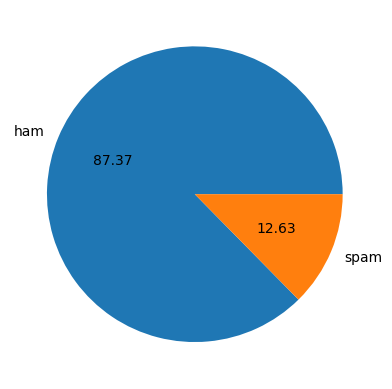

In [16]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(normalize=True)*100, labels = ['ham','spam'], autopct='%0.2f'  )

**data is imbalanced**

In [17]:
import nltk
# nltk.download('punkt')

In [18]:
# characters
df['num_characters'] = df['text'].apply(len)

In [19]:
# num of words
df['num_of_words'] = df['text'].apply( lambda x: len(nltk.word_tokenize(x)) )

In [20]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [21]:
df.drop('target',axis = 1).describe()

,num_characters,num_of_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# ham data
df[df['target'] == 0][['num_characters', 'num_of_words', 'num_sentences']].describe()

,num_characters,num_of_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# spam data
df[df['target'] == 1][['num_characters', 'num_of_words', 'num_sentences']].describe()

,num_characters,num_of_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [24]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

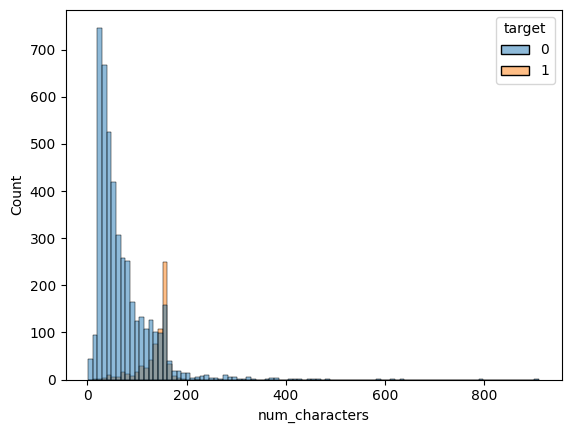

In [25]:
sns.histplot(data = df, x = 'num_characters', hue= 'target')

<Axes: xlabel='num_of_words', ylabel='Count'>

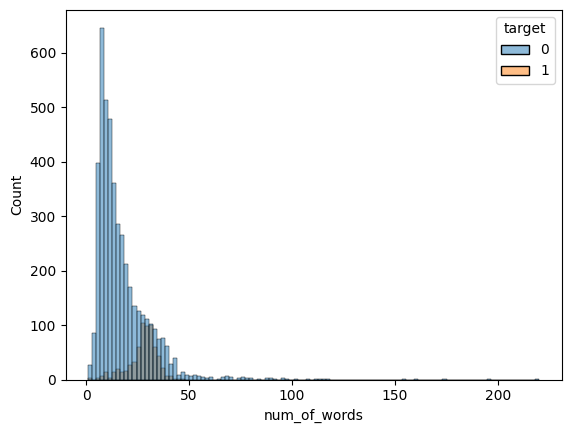

In [26]:
sns.histplot(data = df, x = 'num_of_words', hue= 'target')

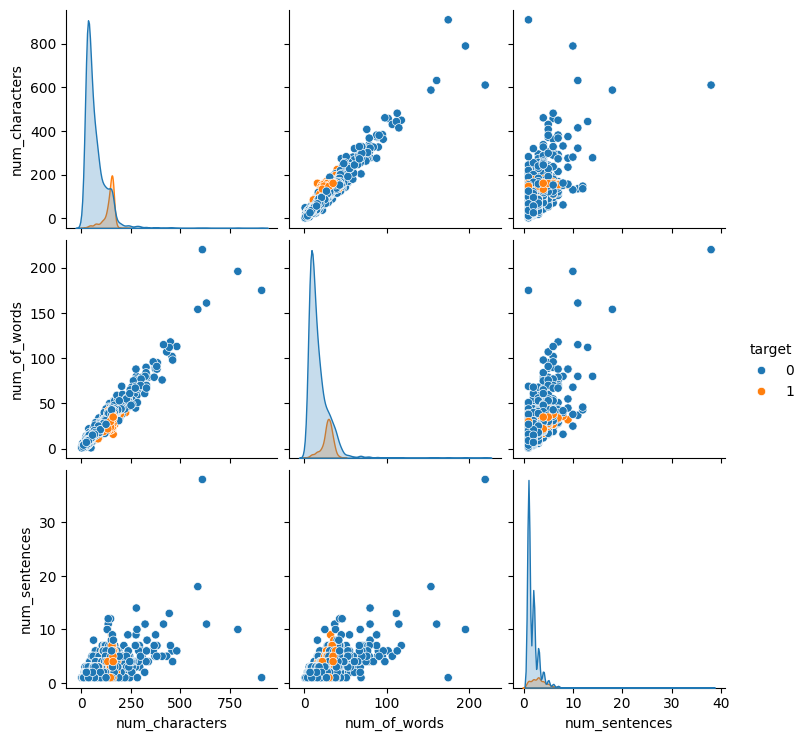

In [27]:
sns.pairplot(df, hue = 'target')

In [28]:
df.corr(numeric_only=True)

,target,num_characters,num_of_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_of_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

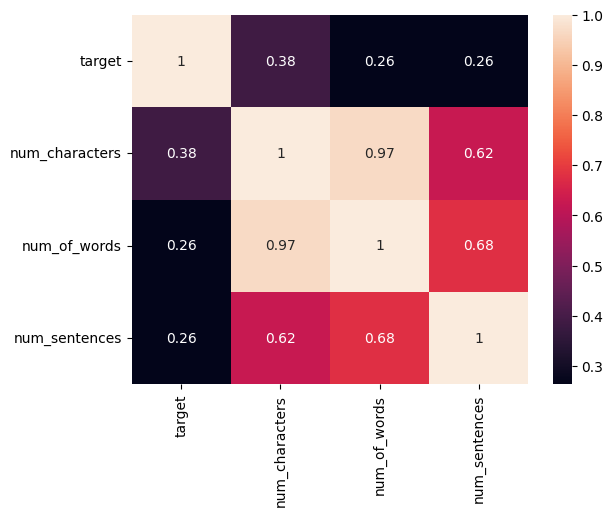

In [29]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

**data has multi-collinearity, which is obvious because, as the number of sentences increases, no of words and characters will also increase**

**I'll be going ahead with "num_characters" as it has highest correlation with the target**

## 3. Data Preprocessing

* Lower case
* Tokenization
* Removing stopwords, special characters and punctuations
* Stemming

In [30]:
# Preprocessing
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum() and word not in stopwords.words('english') ]
    text = [stemmer.stem(word) for word in text]
    return ' '.join(text)

In [31]:
df['transformed_text'] = df['text'].apply(preprocess_text)

In [32]:
from wordcloud import WordCloud
wc = WordCloud(width = 200,height= 200, background_color='white')

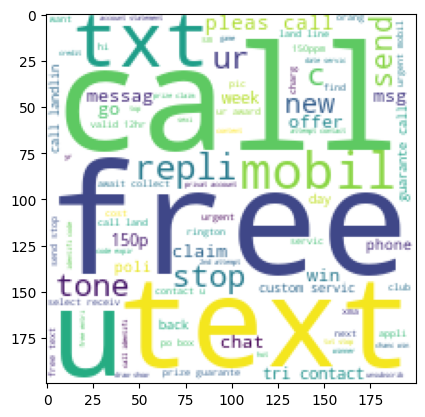

In [33]:
spam_wc = wc.generate_from_text(df[df['target']==1]['transformed_text'].str.cat(sep = ' '))

plt.imshow(spam_wc)

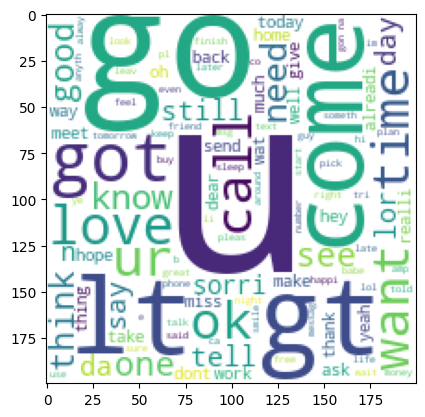

In [34]:
ham_wc = wc.generate_from_text(df[df['target']==0]['transformed_text'].str.cat(sep = ' '))
plt.imshow(ham_wc)

**Lets get top 30 words for each target**

In [35]:
from collections import Counter

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one')])

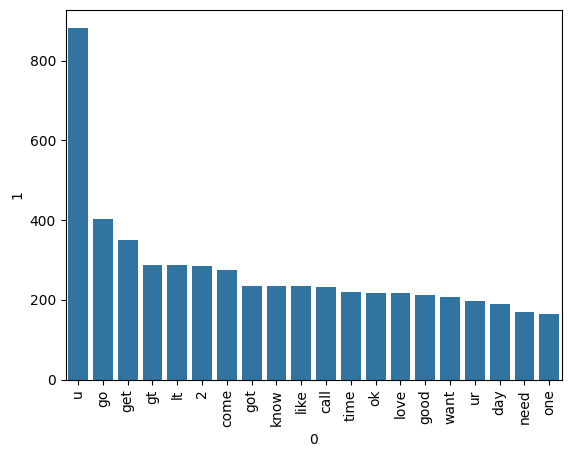

In [36]:
# for ham:
words = df[df['target']==0]['transformed_text'].str.cat(sep=' ').split()
freq = Counter(words).most_common(20)
sns.barplot(x = pd.DataFrame(freq)[0],y =  pd.DataFrame(freq)[1])
plt.xticks(rotation = 'vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia')])

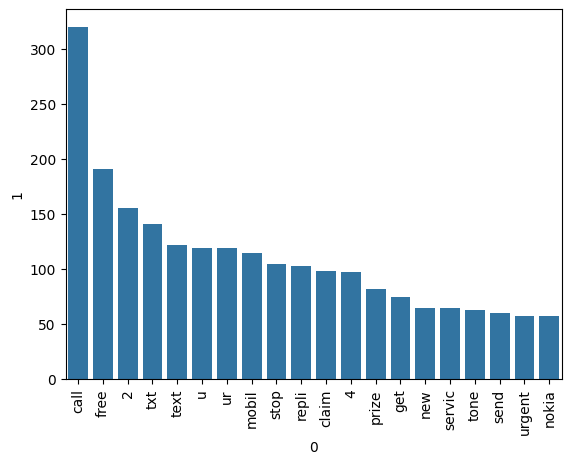

In [37]:
# for spam
words = df[df['target']==1]['transformed_text'].str.cat(sep=' ').split()
freq = Counter(words).most_common(20)
sns.barplot(x = pd.DataFrame(freq)[0],y =  pd.DataFrame(freq)[1])
plt.xticks(rotation = 'vertical')

**Vectorizing the text**

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(df['transformed_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

## 4. Model Building

In [39]:
from sklearn.model_selection import train_test_split

X = tfidf_df.copy()
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,precision_score,classification_report

gnb = GaussianNB()
mnb = MultinomialNB() 
bnb = BernoulliNB()
lr = LogisticRegression()
dtc = DecisionTreeClassifier(max_depth= 5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [41]:
models = {
    'GNB':gnb,
    'MNB':mnb,
    'BNB':bnb,
    'LR':lr,
    'DTC':dtc,
    'RFC':rfc,
    'GBC':gbc
}

In [42]:
def train_model(model, X_train, y_train, X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1score = f1_score(y_test,y_pred)
    return accuracy, precision, f1score

In [43]:
train_model(dtc,X_train, y_train, X_test,y_test)

(0.9337631887456037,
 np.float64(0.8071065989847716),
 np.float64(0.7378190255220418))

In [44]:
accuracy_scores = []
precision_scores= []
f1_scores = []

for name,model in models.items():
    accuracy, precision, f1score = train_model(model,X_train, y_train, X_test,y_test)
    f1_scores.append(f1score)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)    

In [45]:
performance_df = pd.DataFrame({'Model':models.keys(),'Accuracy' : accuracy_scores, 'Precision':precision_scores })
performance_df.sort_values(by = 'Precision', ascending=False).head()

,Model,Accuracy,Precision
1,MNB,0.951348,1.000000
5,RFC,0.965416,0.994350
2,BNB,0.965416,0.978142
6,GBC,0.951348,0.963190
3,LR,0.941383,0.958904


**Trying to improve the model**

In [46]:
tfidf_df.shape

(5169, 6708)

In [47]:
model_name = []
features = []
accuracy_scores = []
precision_scores= []
f1_scores = []

In [48]:


max_features = [5500,5000,4500,4000,3500,3000,2500]

for i in max_features:

    tfidf_vectorizer = TfidfVectorizer(max_features=i)

    tfidf_matrix = tfidf_vectorizer.fit_transform(df['transformed_text'])

    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

    X = tfidf_df.copy()
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



    for name,model in models.items():
        accuracy, precision, f1score = train_model(model,X_train, y_train, X_test,y_test)    
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)    
        features.append(i)
        model_name.append(name)
        f1_scores.append(f1score)

In [49]:
performance_df = pd.DataFrame({'Model':model_name, 'features':features,'accuracy':accuracy_scores,'precision':precision_scores, 'f1_score': f1_scores})
performance_df.sort_values(by = ['precision','accuracy'], ascending=[False,False]).head(10)

,Model,features,accuracy,precision,f1_score
15,MNB,4500,0.961313,1.000000,0.835821
8,MNB,5000,0.959555,1.000000,0.827068
1,MNB,5500,0.957796,1.000000,0.818182
40,RFC,3000,0.972450,0.994709,0.888889
47,RFC,2500,0.971864,0.994681,0.886256
26,RFC,4000,0.966002,0.994382,0.859223
12,RFC,5000,0.965416,0.994350,0.856448
22,MNB,4000,0.963658,0.994253,0.848039
43,MNB,2500,0.971864,0.989474,0.886792
36,MNB,3000,0.970106,0.989305,0.878860


**Lets normalize the values of tfidf**

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

max_features = [5500,5000,4500,4000,3500,3000,2500]

for i in max_features:
    
    tfidf_vectorizer = TfidfVectorizer(max_features=i)

    X = tfidf_vectorizer.fit_transform(df['transformed_text']).toarray()
    scaler = MinMaxScaler()

    X = scaler.fit_transform(X)

    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



    for name,model in models.items():
        accuracy, precision, f1score = train_model(model,X_train, y_train, X_test,y_test)    
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)    
        features.append(i)
        f1_scores.append(f1score)
        model_name.append(name+'_normalised')

In [51]:
performance_df = pd.DataFrame({'Model':model_name, 'features':features,'accuracy':accuracy_scores,'precision':precision_scores, 'f1_score': f1_scores})
performance_df.sort_values(by = ['precision','accuracy'], ascending=[False,False]).head(10)

,Model,features,accuracy,precision,f1_score
52,LR_normalised,5500,0.967761,1.000000,0.866828
59,LR_normalised,5000,0.967761,1.000000,0.866828
66,LR_normalised,4500,0.967761,1.000000,0.866828
15,MNB,4500,0.961313,1.000000,0.835821
8,MNB,5000,0.959555,1.000000,0.827068
1,MNB,5500,0.957796,1.000000,0.818182
40,RFC,3000,0.972450,0.994709,0.888889
89,RFC_normalised,3000,0.972450,0.994709,0.888889
47,RFC,2500,0.971864,0.994681,0.886256
96,RFC_normalised,2500,0.971864,0.994681,0.886256


**normalsied + num_char**

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

max_features = [5500,5000,4500,4000,3500,3000,2500]

for i in max_features:
    
    tfidf_vectorizer = TfidfVectorizer(max_features=i)

    X = tfidf_vectorizer.fit_transform(df['transformed_text']).toarray()
    scaler = MinMaxScaler()

    X = scaler.fit_transform(X)
    X = np.hstack((X, df['num_characters'].values.reshape(-1,1)))
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    for name,model in models.items():
        accuracy, precision, f1score = train_model(model,X_train, y_train, X_test,y_test)    
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)    
        features.append(i)
        f1_scores.append(f1score)
        model_name.append(name+'_normalised_num_char')

d:\Self Study\Projects\SMS Spam Classifier\sms_spam_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Self Study\Projects\SMS Spam Classifier\sms_spam_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [53]:
performance_df = pd.DataFrame({'Model':model_name, 'features':features,'accuracy':accuracy_scores,'precision':precision_scores, 'f1_score': f1_scores})

In [54]:
performance_df.round({"precision":2, 'f1_score':2,"accuracy":2}).sort_values(by = ['precision','f1_score','accuracy'], ascending=[False,False,False]).head(10)

,Model,features,accuracy,precision,f1_score
52,LR_normalised,5500,0.97,1.00,0.87
59,LR_normalised,5000,0.97,1.00,0.87
66,LR_normalised,4500,0.97,1.00,0.87
15,MNB,4500,0.96,1.00,0.84
8,MNB,5000,0.96,1.00,0.83
1,MNB,5500,0.96,1.00,0.82
40,RFC,3000,0.97,0.99,0.89
43,MNB,2500,0.97,0.99,0.89
47,RFC,2500,0.97,0.99,0.89
89,RFC_normalised,3000,0.97,0.99,0.89


**Lets go with LR_normalised model as it is gives almost same f1_score and accuracy with less features**

In [55]:
lr = LogisticRegression()
scaler = MinMaxScaler()

tfidf_vectorizer = TfidfVectorizer(max_features=4500)

X = tfidf_vectorizer.fit_transform(df['transformed_text']).toarray()
X = scaler.fit_transform(X)

y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print()
print("classification_report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[1472    0]
 [  55  179]]

classification_report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1472
           1       1.00      0.76      0.87       234

    accuracy                           0.97      1706
   macro avg       0.98      0.88      0.92      1706
weighted avg       0.97      0.97      0.97      1706



In [56]:
import pickle
pickle.dump(tfidf_vectorizer, open('vectorizer.pkl','wb'))
pickle.dump(scaler, open('normaliser.pkl','wb'))
pickle.dump(lr,open('logistic_reg_model.pkl','wb'))